# FIT3139 Assignment 1

In [98]:
###########################################
# Author: Rishi Bidani
# Student ID: 31883125
# Date: 10/05/2020
###########################################

In [99]:
# All Imports
import numpy as np
import matplotlib.pyplot as plt
import math

In [100]:
# Plot configurations
DEVELOPMENT = True
PLOT_DPI = 80 if DEVELOPMENT else 300

## Part 1 - Model Error
---

### Part 1.1

#### Given function
$ f(x) = cos(x) $

#### Finding the taylor series for f(x) = cos(x)

$$
\begin{align*}

& f(x) = cos(x) \\
& f'(x) = -sin(x) \\
& f''(x) = -cos(x) \\
& f'''(x) = sin(x) \\
& f''''(x) = cos(x) \\

\end{align*}
$$

#### Series formula
$$
\begin{align*}
& \sum^{\infty}_{n=0} (-1)^n * \frac{x^{2n}}{(2n)!}, x \in (-\infty, \infty)
\end{align*}
$$

In [101]:
def taylor_cos(x: int, n: int) -> np.ndarray:
    """Taylor series expansion of cos(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the sum of the taylor series expansion
    """
    return np.sum([(-1)**i * (x**(2*i) / math.factorial(2*i)) for i in range(n)])

#### Estimating the value of $f(x) = cos(x)$ at $x=0$
##### Real value
cos(0) = 1

In [102]:
def print_estimate(domain: int, terms: int) -> None:
    real = np.cos(domain)
    estimates = [taylor_cos(domain, i) for i in range(1, terms+1)]
    print("Domain value: ", domain)
    print(f"Real value: {real}")
    print("Estimate Values")
    for i in range(terms):
        print(f"n={i+1}: {estimates[i]}")
    print("\n")

In [103]:
# domain
x = [0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
x_str = ['0', 'π/4', 'π/2', 'π', '3*π/2', '2*π']
terms = 10
for i, domain in enumerate(x):
    print(f"Taylor Series Expansion of cos(x) at x={x_str[i]}")
    print_estimate(domain, terms)

Taylor Series Expansion of cos(x) at x=0
Domain value:  0
Real value: 1.0
Estimate Values
n=1: 1.0
n=2: 1.0
n=3: 1.0
n=4: 1.0
n=5: 1.0
n=6: 1.0
n=7: 1.0
n=8: 1.0
n=9: 1.0
n=10: 1.0


Taylor Series Expansion of cos(x) at x=π/4
Domain value:  0.7853981633974483
Real value: 0.7071067811865476
Estimate Values
n=1: 1.0
n=2: 0.6915748624659576
n=3: 0.707429206709773
n=4: 0.7071032148228457
n=5: 0.7071068056832942
n=6: 0.7071067810719247
n=7: 0.7071067811869363
n=8: 0.7071067811865466
n=9: 0.7071067811865476
n=10: 0.7071067811865476


Taylor Series Expansion of cos(x) at x=π/2
Domain value:  1.5707963267948966
Real value: 6.123233995736766e-17
Estimate Values
n=1: 1.0
n=2: -0.23370055013616975
n=3: 0.019968957764878226
n=4: -0.0008945229984747317
n=5: 2.473727636469452e-05
n=6: -4.6476600836607633e-07
n=7: 6.321469515740575e-09
n=8: -6.513356455746522e-11
n=9: 5.260665923294585e-13
n=10: -3.3734277440034317e-15


Taylor Series Expansion of cos(x) at x=π
Domain value:  3.141592653589793
Real v

In [104]:
def plot_real_vs_estimate(domain: int, terms: int, str_title) -> None:
    real = np.cos(domain)
    estimates = [taylor_cos(domain, i) for i in range(1, terms+1)]

    plt.figure(dpi=PLOT_DPI)
    plt.scatter(range(1, terms+1), estimates, label=f"cos({domain}) estimate")
    # add line for real value
    plt.axhline(y=real, color='r', linestyle='-', label=f"cos({domain}) real")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Number of terms')
    plt.ylabel('Value')
    plt.title(str_title)
    plt.xticks(range(2, terms+1, 2))
    plt.show()

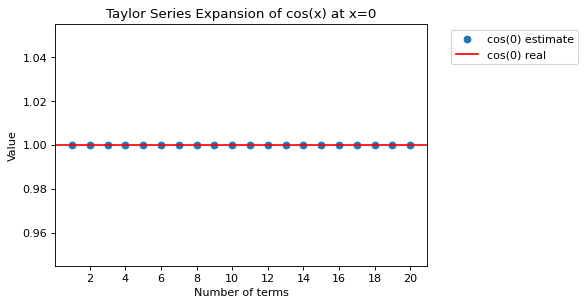

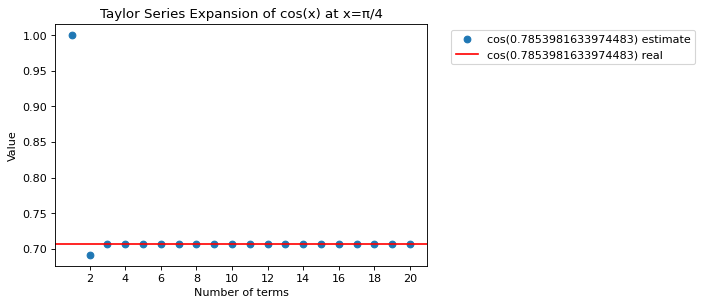

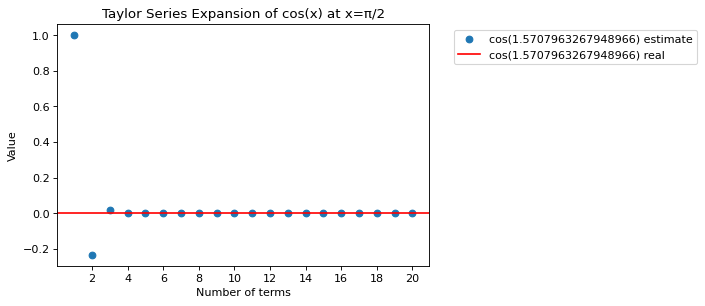

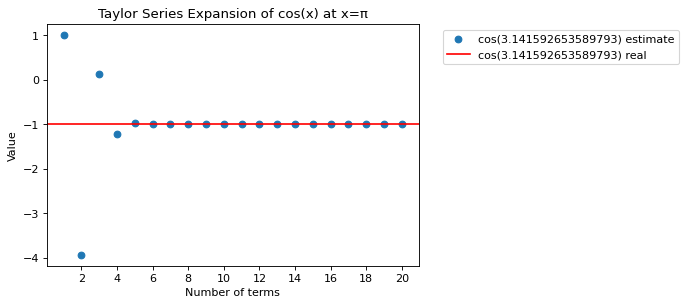

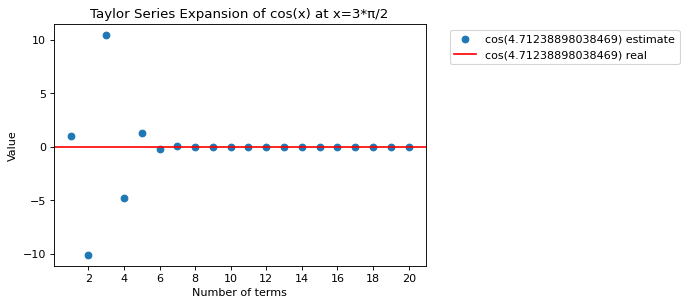

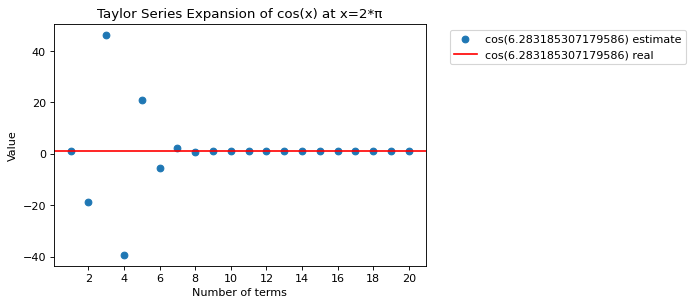

In [105]:
domain = [0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
domain_str = ['0', 'π/4', 'π/2', 'π', '3*π/2', '2*π']
max_terms = 20

for i, d in enumerate(domain):
    plot_real_vs_estimate(d, max_terms, f"Taylor Series Expansion of cos(x) at x={domain_str[i]}")

In [106]:
# plot f(x) = cos(x)
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.cos(x)

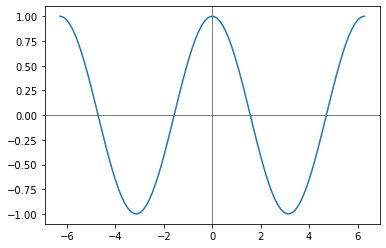

In [107]:
# Plot
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.plot(x, y)

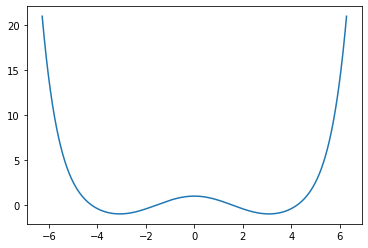

In [108]:
x = np.linspace(-2*np.pi, 2*np.pi, 100000)
y = [taylor_cos(x, 5) for x in x]
plt.plot(x, y, label='n=1')

### Part 1.2

For small values of x the following should hold true

$$
cos(x) = 1 - \frac{x^{2}}{2}
$$

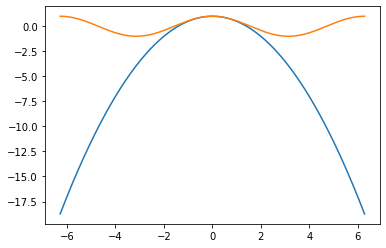

In [109]:
theorem = lambda angle: 1 - angle**2 / 2
x = np.linspace(-2*np.pi, 2*np.pi, 100000)
y_theorem = [theorem(x) for x in x]
y_real = [np.cos(x) for x in x]
plt.plot(x, y_theorem, label='Theorem')
plt.plot(x, y_real, label='Real')

In [110]:
relative_error_tolerance = 0.0001

# find range for which the relative error is less than the tolerance
for i in range(100000):
    if abs(y_theorem[i] - y_real[i]) / y_real[i] < relative_error_tolerance:
        break
print(f'Error is less than {relative_error_tolerance} for x in range [{x[0]}, {x[i]}]')

Error is less than 0.0001 for x in range [-6.283185307179586, -4.71237327226434]


### Part 1.3

## Part 2 - Data error
---

$$
\text{Data Error} = f(\widetilde{x}) - f(x) \\
$$
Where,

$\widetilde{x}$ is an inexact measurement of x


### What I am doing
Given the function $f(x) = cos(2 \pi x)$ I am evaluating the value for the various values of $x$ and different precisions of $\pi$ [pi].

I am using a list of values of $\pi$ with increasing levels of precision - [3, 3.1, 3.14 ....] up to 10 decimals.


In [127]:
func = lambda x, pi: np.cos(2 * pi * x)
real_pi = np.pi
# use real pi to get values at various precisions
# +3 includes the decimal, the last digit etc
pi_values = [float(str(real_pi)[:i]) for i in range(2, 10+3)]
print(pi_values)

[3.0, 3.1, 3.14, 3.141, 3.1415, 3.14159, 3.141592, 3.1415926, 3.14159265, 3.141592653, 3.1415926535]


In [112]:
def plot_function(domain_start: int, domain_end: int, n: int = 1000):
    x_values = np.linspace(domain_start, domain_end, n)
    real_y = [func(x, real_pi) for x in x_values]
    y_values = [[func(x, pi) for x in x_values] for pi in pi_values]

    plt.figure(dpi=PLOT_DPI)
    for i, y in enumerate(y_values):
        plt.plot(x_values, y, label=f"cos(2πx) pi={pi_values[i]}")

    plt.plot(x_values, real_y, label=f"cos(2πx) real")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('cos(2πx) with different values of pi')
    plt.show()

In [113]:
def _get_data_error(domain_start: int, domain_end: int, pi_value, n: int = 1000):
    x_values = np.linspace(domain_start, domain_end, n)
    real_y = [func(x, real_pi) for x in x_values]
    y_values = [func(x, pi_value) for x in x_values]
    # data error = f(estimate) - f(real)
    data_error = [real_y[i] - y_values[i] for i in range(n)]
    return data_error

In [114]:
def get_data_error(domain_start: int, domain_end: int, n: int = 1000):
    data_errors = []
    for pi in pi_values:
        data_errors.append(_get_data_error(domain_start, domain_end, pi, n))
    return data_errors

In [115]:
def plot_error(domain_start: int, domain_end: int, y_lim_start=None, y_lim_end=None, n: int = 1000):
    data_errors = get_data_error(domain_start, domain_end, n)
    x_values = np.linspace(domain_start, domain_end, n)
    plt.figure(dpi=PLOT_DPI)
    for i, error in enumerate(data_errors):
        plt.plot(x_values, error, label=f"pi={pi_values[i]}")

    if y_lim_start and y_lim_end:
        print("Setting y limits")
        plt.axis((None, None, y_lim_start, y_lim_end))
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xlabel('x')
    plt.ylabel('error')
    plt.title('Error in cos(2πx) with different values of pi')
    plt.show()

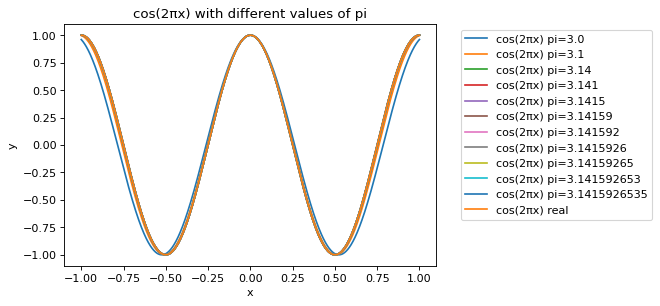

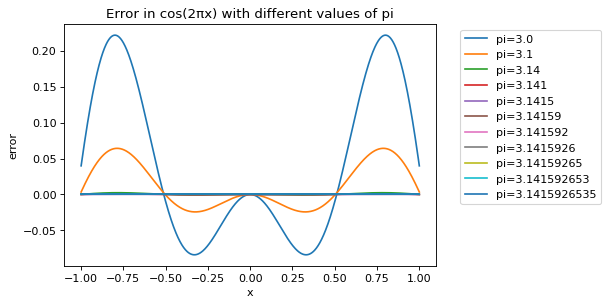

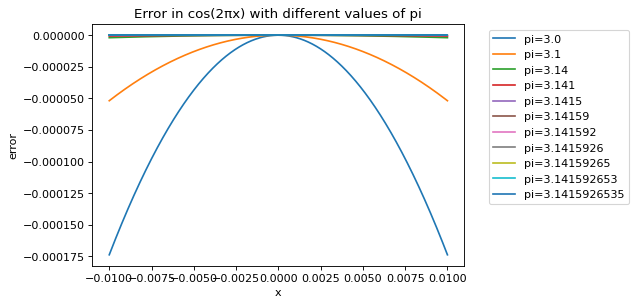

In [116]:
plot_function(-1, 1)
plot_error(-1, 1)
plot_error(-0.01, 0.01)

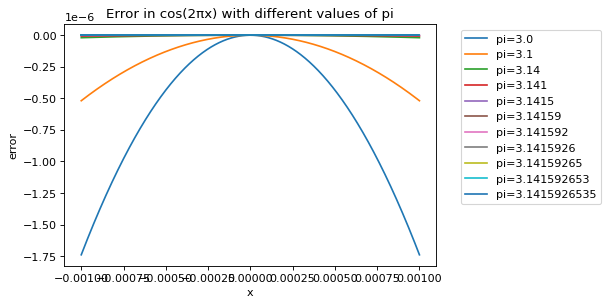

In [117]:
plot_error(-0.001, 0.001)

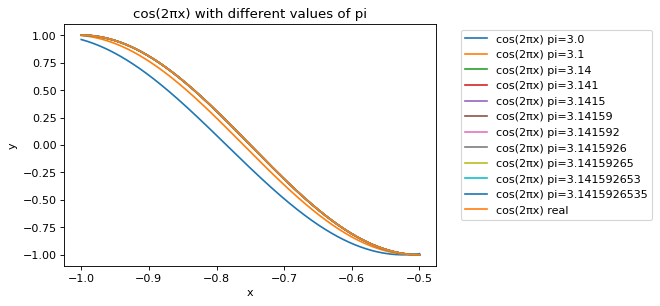

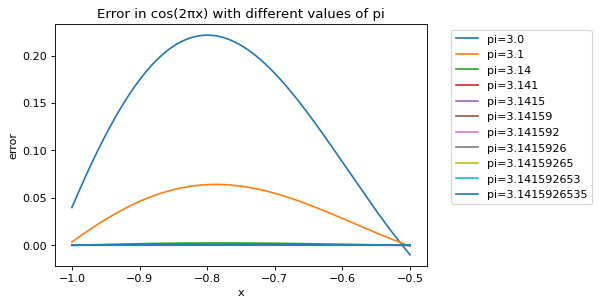

In [118]:
plot_function(-1, -0.5)
plot_error(-1, -0.5)

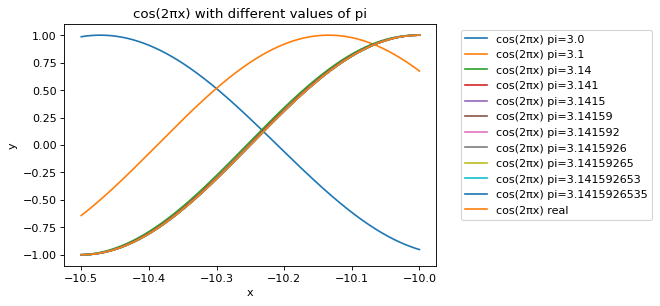

In [119]:
plot_function(-10.5, -10)

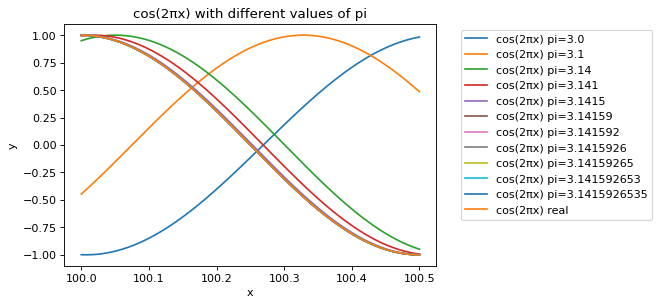

In [120]:
plot_function(100, 100.5)

## Part 3 - Sensitivity and condition number
---

### Measuring Sensitivity of function $f(x) = cos(2 \pi x)$

#### Method 1: Computing ratio between backward and forward error

#### Method 2: Using approximation formula

##### Formula for Condition number

$$
\text{Condition number} = |\frac{x*f'(x)}{f(x)}|
$$

##### Derving Condition number for $f(x)=cos(2 \pi x)$

###### Derivative of the function
$$
\begin{align*}
& f(x) = cos(2 \pi x) \\

& \text{Using chain rule} \\
& f'(x) = -sin(2 \pi x) * \frac{d}{dx} (2 \pi x) \\
& f'(x) =  -sin(2 \pi x) * 2 \pi \\
& f'(x) =  - 2 \pi sin(2 \pi x) \\
\end{align*}
$$

###### Calculating condition number

$$
\begin{gather}
    \text{Condition number} = \frac{x * -2 \pi sin(2 \pi x)}{cos(2 \pi x)} \\ 
    \text{Condition number} = -2 \pi x * tan(2 \pi x)
\end{gather}
$$

Although simplified to tan, I will be using equation (1) to introduce truncation error for the function 